<a href="https://colab.research.google.com/github/tofighi/ITM760/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this session, you will implement Fixed Size Random Sampling over a stream of data with Python. We assume that the *for loop* that goes over the elements of a *dataframe* plays the role of the data stream.
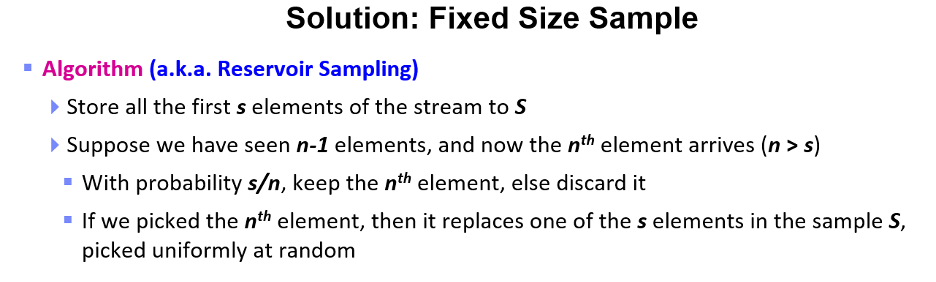

In [2]:
!wget -q https://raw.githubusercontent.com/tofighi/ITM760/main/dataset/SalariesNew.csv

In [3]:
import pandas as pd
import random as rand

# read csv file
df = pd.read_csv("SalariesNew.csv")

# print top-5 rows of the dataframe
print(df.head())

sample_size = 10
# as a good practice, try to add more columns to the sample dataframe
sample_df = pd.DataFrame(columns=['ProfID', 'salary'])

# note: in Pyhton, the index starts from 0
for index, row in df.iterrows():
    element_no = index + 1
    print('element_no', element_no)
    if element_no <= sample_size:
        # store all the first s elements of the stream (up to the sample_size)
        sample_df = sample_df.append({'ProfID': row['ProfID'], 'salary': row['salary']}, ignore_index=True)
        print('this element is added to the sample dataframe')
    else:
        # we have to decide to either keep or discard this element
        keep_probability = sample_size/element_no
        print('keep_probability', keep_probability)
        random_num = rand.uniform(0, 1)
        print('random_num', random_num)
        if random_num <= keep_probability:
            print('keep this element')
            element_removed_index = rand.randint(0, sample_size-1)
            print('element_removed_index', element_removed_index)
            sample_df.loc[element_removed_index] = {'ProfID': row['ProfID'], 'salary': row['salary']}
        else:
            print('discard this element')
    print('--------------------------------------------------')

print('size of the SAMPLE dataframe is:', len(sample_df))
print(sample_df.head(sample_size))

   ProfID      rank discipline  yrs.since.phd  yrs.service     sex  salary
0       1      Prof          B             19           18    Male  139750
1       2      Prof          B             20           16    Male  173200
2       3  AsstProf          B              4            3  Female   79750
3       4      Prof          B             45           39  Female  115000
4       5      Prof          B             40           41  Female  141500
element_no 1
this element is added to the sample dataframe
--------------------------------------------------
element_no 2
this element is added to the sample dataframe
--------------------------------------------------
element_no 3
this element is added to the sample dataframe
--------------------------------------------------
element_no 4
this element is added to the sample dataframe
--------------------------------------------------
element_no 5
this element is added to the sample dataframe
--------------------------------------------------
